In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import matplotlib.pyplot as plt

In [3]:
from envorinment import BananaEnv
from experiment import Experiment
from agent import DqnAgent
from replay_buffer import ReplayBuffer
from model import DqnModel
from strategy import *

### Experiment
For an experiment we need an agent and an environment

### The environment

In [4]:
env = BananaEnv('Banana_Linux_NoVis/Banana.x86_64')

Found path: /home/pbazan/sources/udacity_drl/p1_navigation/Banana_Linux_NoVis/Banana.x86_64
Mono path[0] = '/home/pbazan/sources/udacity_drl/p1_navigation/Banana_Linux_NoVis/Banana_Data/Managed'
Mono config path = '/home/pbazan/sources/udacity_drl/p1_navigation/Banana_Linux_NoVis/Banana_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/pbazan/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### The agent
DqnAgent requires several things:
- model - a torch model -> `DqnModel`
- memory - a reply buffer -> `ReplyBuffer`
- train_strategy - one of the strategies like `LinearEpsilonGreedyStrategy` or `ExponentialEpsilonGreedyStrategy`

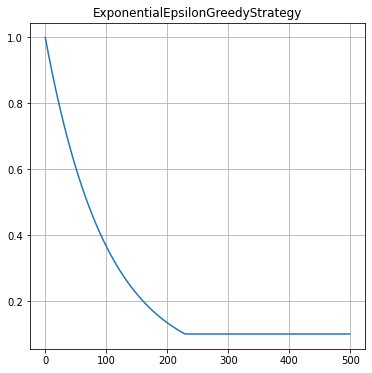

In [5]:
model = DqnModel(input_dim=env.nS, output_dim=env.nA, hidden_dims=(64, 64))
memory = ReplayBuffer(max_size=50_000)
train_strategy = ExponentialEpsilonGreedyStrategy(eps_start=1., eps_min=.1, decay=.99)
train_strategy.display(500)

In [12]:
agent = DqnAgent(model, memory, train_strategy, ddqn=False, gamma=.9, batch_size=32, lr=1e-3, train_every_steps=4, update_target_every_steps=4, tau=.2)

### The experiment

In [13]:
exp = Experiment(env, agent)

In [ ]:
exp.train(500)

Episode: 125, score: 6.000, agent_avg_loss: 0.009, epsilon: 0.2859

In [ ]:
exp.history['agent_avg_loss'].plot();
exp.history['agent_avg_loss'].rolling(10).mean().plot(label='mean');
plt.legend();

In [ ]:
exp.history['score'].plot();
exp.history['score'].rolling(100).mean().plot(label='mean')
plt.legend();